# 线性模型

就是给出由d个属性描述的实例x=(x1,x2,x3,...xd),xi表示第i个维度的属性
线性模型就是试图学习一个线性组合进行预测
即f(x)=w1x1+w2x2+....+wdxd+b

或者用向量的形式表示 f(x)=wx+b

所有的w和b都是要学习的参数

In [1]:
#一维线性回归
import torch
import numpy as np
x_train=np.array([[3.3],[4.4],[5.5],[6.71],[6.93],
                  [4.168],[9.779],[6.182],[7.59],[2.167],
                  [7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train=np.array([[1.7],[2.76],[2.09],[3.19],[1.694],
                  [1.573],[3.366],[2.596],[2.53],[1.221],
                  [2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.show()
#s数据点样子

<Figure size 640x480 with 1 Axes>

In [3]:
from torch.autograd import Variable
#使用pytorch，先将ndarray转换成Tensor
x=Variable(torch.from_numpy(x_train))
y=Variable(torch.from_numpy(y_train))

In [4]:
class LR(torch.nn.Module):
    def __init__(self):
        super(LR,self).__init__()
        self.linear=torch.nn.Linear(1,1)
    
    def forward(self,x):
        out=self.linear(x)
        return out

net=LR()
#建立模型

In [5]:
#定义损失函数和优化函数
loss_func=torch.nn.MSELoss()
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)

In [6]:
#开始训练模型
EPOCH=500#迭代次数
for epoch in range(EPOCH):
    out=net(x)
    loss=loss_func(out,y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    print('Epoch:[{}/{}],loss:'.format(epoch+1,EPOCH),"%.6f" %loss)
    

Epoch:[1/500],loss: 44.569366
Epoch:[2/500],loss: 1.108971
Epoch:[3/500],loss: 0.304055
Epoch:[4/500],loss: 0.288555
Epoch:[5/500],loss: 0.287667
Epoch:[6/500],loss: 0.287053
Epoch:[7/500],loss: 0.286447
Epoch:[8/500],loss: 0.285844
Epoch:[9/500],loss: 0.285244
Epoch:[10/500],loss: 0.284648
Epoch:[11/500],loss: 0.284054
Epoch:[12/500],loss: 0.283463
Epoch:[13/500],loss: 0.282876
Epoch:[14/500],loss: 0.282291
Epoch:[15/500],loss: 0.281709
Epoch:[16/500],loss: 0.281131
Epoch:[17/500],loss: 0.280555
Epoch:[18/500],loss: 0.279982
Epoch:[19/500],loss: 0.279413
Epoch:[20/500],loss: 0.278846
Epoch:[21/500],loss: 0.278282
Epoch:[22/500],loss: 0.277721
Epoch:[23/500],loss: 0.277163
Epoch:[24/500],loss: 0.276607
Epoch:[25/500],loss: 0.276055
Epoch:[26/500],loss: 0.275505
Epoch:[27/500],loss: 0.274959
Epoch:[28/500],loss: 0.274415
Epoch:[29/500],loss: 0.273873
Epoch:[30/500],loss: 0.273335
Epoch:[31/500],loss: 0.272799
Epoch:[32/500],loss: 0.272266
Epoch:[33/500],loss: 0.271736
Epoch:[34/500],los

Epoch:[478/500],loss: 0.179342
Epoch:[479/500],loss: 0.179288
Epoch:[480/500],loss: 0.179235
Epoch:[481/500],loss: 0.179182
Epoch:[482/500],loss: 0.179129
Epoch:[483/500],loss: 0.179077
Epoch:[484/500],loss: 0.179025
Epoch:[485/500],loss: 0.178973
Epoch:[486/500],loss: 0.178921
Epoch:[487/500],loss: 0.178870
Epoch:[488/500],loss: 0.178819
Epoch:[489/500],loss: 0.178768
Epoch:[490/500],loss: 0.178718
Epoch:[491/500],loss: 0.178667
Epoch:[492/500],loss: 0.178617
Epoch:[493/500],loss: 0.178568
Epoch:[494/500],loss: 0.178518
Epoch:[495/500],loss: 0.178469
Epoch:[496/500],loss: 0.178420
Epoch:[497/500],loss: 0.178371
Epoch:[498/500],loss: 0.178323
Epoch:[499/500],loss: 0.178274
Epoch:[500/500],loss: 0.178226


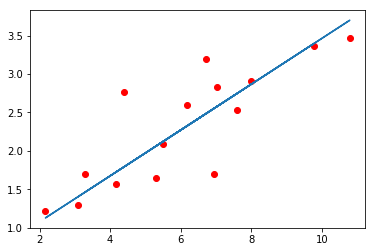

In [7]:
#测试一下结果
#首先通过net.eval()将模式变成测试模式
#【因为有些层操作，比如dropout在训练和测试的时候是不一样的】
net.eval()
predict=net(x)
prediction=predict.data.numpy()
plt.figure()
plt.plot(x_train,y_train,'ro',label='origin')
plt.plot(x_train,prediction,label='prediction')
plt.show()

In [8]:
list(range(1,4))

[1, 2, 3]

In [9]:
x=torch.randn(4)
print(x)
x=x.unsqueeze(1)
print(x)
x=torch.cat([x**i for i in range(1,4)],1)
print(x)
print(x.mm(torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)))

tensor([-1.7998, -1.8998,  0.0446, -0.3446])
tensor([[-1.7998],
        [-1.8998],
        [ 0.0446],
        [-0.3446]])
tensor([[-1.7998e+00,  3.2395e+00, -5.8305e+00],
        [-1.8998e+00,  3.6091e+00, -6.8563e+00],
        [ 4.4626e-02,  1.9915e-03,  8.8873e-05],
        [-3.4458e-01,  1.1874e-01, -4.0915e-02]])
tensor([[-5.1748],
        [-6.5779],
        [ 0.0285],
        [ 0.0857]])


In [10]:
#多项式回归
#每个参数 y=b+w1x+w2x^2+....
#所以我们要预处理数据
def make_features(x):
    x=x.unsqueeze(1)#将原来的tensor大小由3变成(3,1)
    return torch.cat([x**i for i in range(1,4)],1)#torch.cat()来拼接Tensor
'''
x1,x1^2 x1^3
x2 x2^2 x2^3
x3 x3^2 x3^3
...
'''

'\nx1,x1^2 x1^3\nx2 x2^2 x2^3\nx3 x3^2 x3^3\n...\n'

In [11]:
#给出参数W_target，b_target
w_target=torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target=torch.FloatTensor([0.9])

#定义函数
def f(x):
    return x.mm(w_target)+b_target[0]
#x.mm(w_target)矩阵乘法

#这一块是我们需要去拟合的曲线

In [12]:
#采用minibatch进行采样（这里为什么不用Dataloader包直接？因为我们没有数据集）
def get_batch(Batch_size=32):
    random=torch.randn(Batch_size)#从标准正态分布中随机选取32个点
    x=make_features(random)
    y=f(x)#实际上每个x应该得到的y
    return x,y

In [13]:
#定义多项式回归模型
class net2(torch.nn.Module):
    def __init__(self):
        super(net2,self).__init__()
        self.net2=torch.nn.Linear(3,1)
    
    def forward(self,x):
        out=self.net2(x)
        return out
model=net2()

In [14]:
#定义损失函数和优化函数
loss_func2=torch.nn.MSELoss()
optimizer2=torch.optim.SGD(model.parameters(),lr=0.01)

In [15]:
batch_num=0
while True:
    batch_x,batch_y=get_batch()
    batch_x=Variable(batch_x)
    batch_y=Variable(batch_y)
    prediction=model(batch_x)
    loss=loss_func2(prediction,batch_y)
    
    
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    batch_num=batch_num+1
    if(loss<0.01):
        break
    

In [25]:
#print(list(model.parameters())[0][0][0].item())
a=list(model.parameters())[0][0][0].item()
b=list(model.parameters())[0][0][1].item()
c=list(model.parameters())[0][0][2].item()
d=list(model.parameters())[1][0].item()
print(a)
print(b)
print(c)
print(d)

0.6524094939231873
2.9782629013061523
2.366082191467285
0.9640408754348755


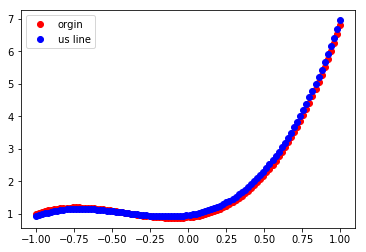

In [33]:
w_target=torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target=torch.FloatTensor([0.9])
ls_x=np.linspace(-1,1,100)
ls_y=0.5*ls_x+3*(ls_x**2)+2.4*(ls_x**3)+0.9
ls_y2=a*ls_x+b*(ls_x**2)+c*(ls_x**3)+d
plt.plot(ls_x,ls_y,'ro',label='orgin')
plt.plot(ls_x,ls_y2,'bo',label='us line')
plt.legend(loc='best')
plt.show()